# DSI Summer Workshops Series


Peggy Lindner<br>
Center for Advanced Computing & Data Science (CACDS)<br>
Data Science Institute (DSI)<br>
University of Houston  
plindner@uh.edu 


This Notebook is available at:
http://bitly.com/UHDSInotebook1

You can already download it! Use the "Save Link as" method.

Please make sure you have a copy of R up and running, as well as a Python 3 installation (ideally from Anacodna).

## Goals for today

Understand basics of text analysis using R

(well enough so that you can Google your problems, find the answer, and implement it.)

#### More specifically

1. Up and running with R & IPython
2. Understand a basic exploratory data analysis workflow
3. Basics of R and Topic Modeling 

#### Why R and not Python 

It's good for data exploration! 

## Part 1: Getting yourself ready

### First: Install software on your computer

* R [CRAN](https://www.anaconda.com/download/)
* Python[Anaconda](https://www.anaconda.com/download/)




### Second: Prep your R environment
On a Mac open a terminal and start R

![](https://raw.github.com/peggylind/DSI_Summer_Workshops/master/images/on-a-mac.png)

On Windows: Open the Anaconda Command line and start R

![](https://raw.github.com/peggylind/DSI_Summer_Workshops/master/images/anaconda-start.png)

![](https://raw.github.com/peggylind/DSI_Summer_Workshops/master/images/windows.png)

Now let's install some packages ...

```
> install.packages(c('repr', 'IRdisplay', 'evaluate', 'crayon', 'pbdZMQ', 'devtools', 'uuid', 'digest'))
> devtools::install_github('IRkernel/IRkernel')
```

When you see "Please select a CRAN mirror" , well select one.

![](https://raw.github.com/peggylind/DSI_Summer_Workshops/master/images/cran-repo.png)

... one last step - installing the Kernel

```
> IRkernel::installspec()
```

Now we can close the R environment (but leave your terminal and console open)


```
> quit()
```

Say "N" (no) when asked to save the workspace.

### Jupyter Notebooks is what we will be going to use

We are now ready to start up our Jupyter Environment from the terminal or the console:

```
$ jupyter notebook --notebook-dir C:/Users/[your username]

or on a Mac

$ jupyter notebook --notebook-dir /Users/[your username]
```

And your browser should open at the address: http://localhost:8888/tree

![](https://raw.github.com/peggylind/DSI_Summer_Workshops/master/images/jupyter.png)

#### Open the downloaded notebook on your computer

![](https://raw.github.com/peggylind/DSI_Summer_Workshops/master/images/second-screen.png)


#### Quick intro to Jupyter notebooks

Cells can be Markdown (like this one) or code


#### To start off with

Make sure you hit `Shift-Enter` or `Ctrl-Enter` when you are done.

In [1]:
2 + 2

[1] 4

### Part 2: The Exploratory Analysis Workflow

![](https://raw.github.com/peggylind/DSI_Summer_Workshops/master/images/data-science-workflow.png)
Image source: Hadley Wickham, R for Data Science

#### Our Example 

Media Analysis of a bunch of articles downloaded from a database called "Factiva"

![](https://raw.github.com/peggylind/DSI_Summer_Workshops/master/images/factiva.png)


Make sure you download the data source file: http://bit.ly/UHDSIdata1 and store it in the Jupyter notebook directory (next to the *.ipynb file)

#### Frequently used R Packages in conjunction with text data

* [readr](https://cran.r-project.org/web/packages/readr/readr.pdf) Import data

Data Analysis of text based material

* [stringr](https://cran.r-project.org/web/packages/stringr/vignettes/stringr.html) Clean up text
* [SnowballC](https://cran.r-project.org/web/packages/SnowballC/SnowballC.pdf)  Stemming of words
* [tm](https://cran.r-project.org/web/packages/tm/vignettes/tm.pdf) Text mining
* [Quanteda](https://quanteda.io/) veratile text analysis tool

Visualization

* [ggplot2](http://ggplot2.tidyverse.org/) Modern R visulaizations
* [wordcloud](http://developer.marvel.com) Make some nice word clouds
* [RColorBrewer](https://dataset.readthedocs.org/en/latest/) Get color into your visualizations



In [3]:
#load all required libraries
library(readr)
library(stringr)
library(SnowballC)
library(wordcloud)
library(RColorBrewer)
library(tm)

Loading required package: RColorBrewer
Loading required package: NLP

Attaching package: ‘NLP’

The following object is masked from ‘package:ggplot2’:

    annotate



#### Data Import

In [9]:
# put the name of your csv file
inputfile <- "AJA_Factiva.txt"
# read the data
alldata <- read_file(inputfile)
# look at the dat
# what type is our data?
str(alldata)

 chr " \n\n\nTurkey rejects US 'double standard' in Syria ceasefire\n\n474 words\n6 March 2018\nAl Jazeera English\nA"| __truncated__


#### Prepare data

In [10]:
# data wrangling - split the file in different articles 
split.word <- "Document AJAZEN(.*)" 

# split up into individual documents
list_alldata_splitted <- str_split(alldata, split.word)
# convert to vector and remove last element (which is a leftover)
alldata_splitted <- unlist(list_alldata_splitted)
alldata_splitted <- alldata_splitted[-length(alldata_splitted)]
str(alldata_splitted)

 chr [1:71] " \n\n\nTurkey rejects US 'double standard' in Syria ceasefire\n\n474 words\n6 March 2018\nAl Jazeera English\nA"| __truncated__ ...


In [17]:
### create corpus 
article.corpus <- Corpus(VectorSource((alldata_splitted)))

article.corpus

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 71

In [14]:
#inspect a particular document
writeLines(as.character(article.corpus[[30]]))





Qatar-Gulf crisis: All the latest updates

630 words
17 February 2018
Al Jazeera English
AJAZEN
English
Copyright 2018 Al Jazeera English. 

Here are all the latest updates of the Qatar-Gulf crisis, now in its eighth month.

Seven months ago, an air, sea and land blockade was imposed on Qatar by neighbouring countries. Here are the latest developments as of Saturday, February 17:

Munich Security Conference

"It has been a futile crisis, manufactured by our neighbours," Qatari Emir Sheikh Tamim bin Hamad Al Thani told a major security conference held in Germany on Friday. "By defusing the impact of the illegal and aggressive measures imposed on our people, Qatar has preserved its sovereignty."

* "Those aggressive actors wish to use smaller states as pawns within their power games and sectarian conflicts. It is vital to the interests of the people of the Middle East to guarantee the sovereignty of states like Qatar."

Tillerson in Kuwait

* On Tuesday, the US Secretary of State Re

In [12]:
#Check details (look at bunched up corpus to find anomalies)
inspect(article.corpus)





Qatar-Gulf crisis: All the latest updates

630 words
17 February 2018
Al Jazeera English
AJAZEN
English
Copyright 2018 Al Jazeera English. 

Here are all the latest updates of the Qatar-Gulf crisis, now in its eighth month.

Seven months ago, an air, sea and land blockade was imposed on Qatar by neighbouring countries. Here are the latest developments as of Saturday, February 17:

Munich Security Conference

"It has been a futile crisis, manufactured by our neighbours," Qatari Emir Sheikh Tamim bin Hamad Al Thani told a major security conference held in Germany on Friday. "By defusing the impact of the illegal and aggressive measures imposed on our people, Qatar has preserved its sovereignty."

* "Those aggressive actors wish to use smaller states as pawns within their power games and sectarian conflicts. It is vital to the interests of the people of the Middle East to guarantee the sovereignty of states like Qatar."

Tillerson in Kuwait

* On Tuesday, the US Secretary of State Re

#### Data cleaning

In [18]:
#create the toSpace content transformer 
toSpace <- content_transformer(function(x, pattern) { return (gsub(pattern, " ", x))})
#to remove potentially problematic symbols
article.corpus <- tm_map(article.corpus, toSpace, "-")
article.corpus <- tm_map(article.corpus, toSpace, ":")
article.corpus <- tm_map(article.corpus, toSpace, "'")
article.corpus <- tm_map(article.corpus, toSpace, "'")
article.corpus <- tm_map(article.corpus, toSpace, " -")

#Good practice to check after each step.
writeLines(as.character(article.corpus[[30]]))





Qatar Gulf crisis  All the latest updates

630 words
17 February 2018
Al Jazeera English
AJAZEN
English
Copyright 2018 Al Jazeera English. 

Here are all the latest updates of the Qatar Gulf crisis, now in its eighth month.

Seven months ago, an air, sea and land blockade was imposed on Qatar by neighbouring countries. Here are the latest developments as of Saturday, February 17 

Munich Security Conference

"It has been a futile crisis, manufactured by our neighbours," Qatari Emir Sheikh Tamim bin Hamad Al Thani told a major security conference held in Germany on Friday. "By defusing the impact of the illegal and aggressive measures imposed on our people, Qatar has preserved its sovereignty."

* "Those aggressive actors wish to use smaller states as pawns within their power games and sectarian conflicts. It is vital to the interests of the people of the Middle East to guarantee the sovereignty of states like Qatar."

Tillerson in Kuwait

* On Tuesday, the US Secretary of State Re

In [19]:
#Remove punctuation - replace punctuation marks with " "
article.corpus <- tm_map(article.corpus, removePunctuation)

#Good practice to check after each step.
writeLines(as.character(article.corpus[[30]]))





Qatar Gulf crisis  All the latest updates

630 words
17 February 2018
Al Jazeera English
AJAZEN
English
Copyright 2018 Al Jazeera English 

Here are all the latest updates of the Qatar Gulf crisis now in its eighth month

Seven months ago an air sea and land blockade was imposed on Qatar by neighbouring countries Here are the latest developments as of Saturday February 17 

Munich Security Conference

It has been a futile crisis manufactured by our neighbours Qatari Emir Sheikh Tamim bin Hamad Al Thani told a major security conference held in Germany on Friday By defusing the impact of the illegal and aggressive measures imposed on our people Qatar has preserved its sovereignty

 Those aggressive actors wish to use smaller states as pawns within their power games and sectarian conflicts It is vital to the interests of the people of the Middle East to guarantee the sovereignty of states like Qatar

Tillerson in Kuwait

 On Tuesday the US Secretary of State Rex Tillerson said that t

In [20]:
#Transform to lower case
article.corpus <- tm_map(article.corpus,content_transformer(tolower))

#Strip digits
article.corpus <- tm_map(article.corpus, removeNumbers)

#Remove stopwords from standard stopword list 
article.corpus <- tm_map(article.corpus, removeWords, stopwords("english"))

#inspect output
writeLines(as.character(article.corpus[[30]]))





qatar gulf crisis    latest updates

 words
 february 
al jazeera english
ajazen
english
copyright  al jazeera english 

    latest updates   qatar gulf crisis now   eighth month

seven months ago  air sea  land blockade  imposed  qatar  neighbouring countries    latest developments   saturday february  

munich security conference

    futile crisis manufactured   neighbours qatari emir sheikh tamim bin hamad al thani told  major security conference held  germany  friday  defusing  impact   illegal  aggressive measures imposed   people qatar  preserved  sovereignty

  aggressive actors wish  use smaller states  pawns within  power games  sectarian conflicts   vital   interests   people   middle east  guarantee  sovereignty  states like qatar

tillerson  kuwait

  tuesday  us secretary  state rex tillerson said   restoration  arab gulf unity    best interest   parties   region

 tillerson made  assertion   press conference held  kuwait    attending  high level meeting  members   u

[Stopwords](https://github.com/arc12/Text-Mining-Weak-Signals/wiki/Standard-set-of-english-stopwords)

In [22]:
#define and eliminate all custom stopwords
myStopwords <- c("monday")
article.corpus <- tm_map(article.corpus, removeWords, myStopwords)

#Strip whitespace (cosmetic?)
article.corpus <- tm_map(article.corpus, stripWhitespace)

#inspect output
writeLines(as.character(article.corpus[[30]]))

qatar gulf crisi latest updat word februari al jazeera english ajazen english copyright al jazeera english latest updat qatar gulf crisi now eighth month seven month ago air sea land blockad impos qatar neighbour countri latest develop saturday februari munich secur confer futil crisi manufactur neighbour qatari emir sheikh tamim bin hamad al thani told major secur confer held germani friday defus impact illeg aggress measur impos peopl qatar preserv sovereignti aggress actor wish use smaller state pawn within power game sectarian conflict vital interest peopl middl east guarante sovereignti state like qatar tillerson kuwait tuesday us secretari state rex tillerson said restor arab gulf uniti best interest parti region tillerson made assert press confer held kuwait attend high level meet member us led coalit islam state iraq levant isil also known isi asian championship leagu al gharafa qatar open asian championship leagu campaign abu dhabi al jazira unit arab emir uae request play gam

[Word Stemming](http://www.omegahat.net/Rstem/stemming.pdf)

In [23]:
#Stem document
article.corpus <- tm_map(article.corpus,stemDocument)

#inspect output
writeLines(as.character(article.corpus[[30]]))

qatar gulf crisi latest updat word februari al jazeera english ajazen english copyright al jazeera english latest updat qatar gulf crisi now eighth month seven month ago air sea land blockad impo qatar neighbour countri latest develop saturday februari munich secur confer futil crisi manufactur neighbour qatari emir sheikh tamim bin hamad al thani told major secur confer held germani friday defus impact illeg aggress measur impo peopl qatar preserv sovereignti aggress actor wish use smaller state pawn within power game sectarian conflict vital interest peopl middl east guarant sovereignti state like qatar tillerson kuwait tuesday us secretari state rex tillerson said restor arab gulf uniti best interest parti region tillerson made assert press confer held kuwait attend high level meet member us led coalit islam state iraq levant isil also known isi asian championship leagu al gharafa qatar open asian championship leagu campaign abu dhabi al jazira unit arab emir uae request play game t

#### Prepare for Analysis

In [24]:
#Create document-term matrix
dtm <- DocumentTermMatrix(article.corpus)

dtm

<<DocumentTermMatrix (documents: 71, terms: 3575)>>
Non-/sparse entries: 15940/237885
Sparsity           : 94%
Maximal term length: 16
Weighting          : term frequency (tf)

In [25]:
#inspect segment of document term matrix
inspect(dtm[12:13,1000:1005])

<<DocumentTermMatrix (documents: 2, terms: 6)>>
Non-/sparse entries: 0/12
Sparsity           : 100%
Maximal term length: 10
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs china cia condit convent countrysid covert
  12     0   0      0       0          0      0
  13     0   0      0       0          0      0


qatar gulf crisi latest updat word februari al jazeera english ajazen english copyright al jazeera english latest updat qatar gulf crisi now eighth month seven month ago air sea land blockad impos qatar neighbour countri latest develop saturday februari munich secur confer futil crisi manufactur neighbour qatari emir sheikh tamim bin hamad al thani told major secur confer held germani friday defus impact illeg aggress measur impos peopl qatar preserv sovereignti aggress actor wish use smaller state pawn within power game sectarian conflict vital interest peopl middl east guarante sovereignti state like qatar tillerson kuwait tuesday us secretari state rex tillerson said restor arab gulf uniti best interest parti region tillerson made assert press confer held kuwait attend high level meet member us led coalit islam state iraq levant isil also known isi asian championship leagu monday al gharafa qatar open asian championship leagu campaign abu dhabi al jazira unit arab emir uae request p

<<DocumentTermMatrix (documents: 71, terms: 3594)>>
Non-/sparse entries: 15965/239209
Sparsity           : 94%
Maximal term length: 16
Weighting          : term frequency (tf)

<<DocumentTermMatrix (documents: 2, terms: 6)>>
Non-/sparse entries: 0/12
Sparsity           : 100%
Maximal term length: 10
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs chemic china cia condit convent countrysid
  12      0     0   0      0       0          0
  13      0     0   0      0       0          0


[1] 3594

said   syria  syrian jazeera   state english 
    348     347     299     243     217     214

rampant       riyadh secessionist        stabl      starvat       takeov 
           1            1            1            1            1            1

<<DocumentTermMatrix (documents: 71, terms: 1255)>>
Non-/sparse entries: 9272/79833
Sparsity           : 90%
Maximal term length: 15
Weighting          : term frequency (tf)

[1] 1255

assad turkish  israel kurdish  russia   rebel 
    116     103     103      89      78      74

weaponri     tribe    revolt   technic     event diplomaci 
        3         3         3         3         3         3

[1] "eastern"  "right"    "turkish"  "kurdish"  "rebel"    "iran"    
 [7] "qatar"    "assad"    "children" "isra"     "israel"   "russia"

$turkish
kurdistan    worker   kurdish    ankara  northern 
     0.78      0.74      0.72      0.64      0.63

$children
   jihadist       natur     suspici        tool        went        trap 
       0.99        0.99        0.99        0.85        0.83        0.81 
 journalist      surviv       child         yet    constant     languag 
       0.79        0.79        0.78        0.75        0.70        0.70 
    english      levant         abe       adult         ahe     audienc 
       0.69        0.69        0.69        0.69        0.69        0.69 
       bana      bizarr       bogus   countless     coverag        crew 
       0.69        0.69        0.69        0.69        0.69        0.69 
     crusad      deprav      deserv    discount    discours      dispos 
       0.69        0.69        0.69        0.69        0.69        0.69 
   distress        fair       fault         fbi       feroc     florida 
       0.69        0.69        0.69        0.69        0.69        0.69 
        fun        hole     humanis       imper      imperi imperialist 
       0.69        0.69        0.69        0.69        0.69        0.69 
      logic  mainstream   merciless   mouthpiec      murder         nra 
       0.69        0.69        0.69        0.69        0.69        0.69 
   oblivion      obsess       onlin   oppressor    otherwis     perfect 
       0.69        0.69        0.69        0.69        0.69        0.69 
    refocus      rehash       roost     ruffalo     shooter     sixteen 
       0.69        0.69        0.69        0.69        0.69        0.69 
    somehow      stream    survivor    sympathi      tamimi       tempt 
       0.69        0.69        0.69        0.69        0.69        0.69 
   theorist      thrice   unaddress unnecessari        vagu     vicious 
       0.69        0.69        0.69        0.69        0.69        0.69 
     vilifi       viral        wasn      widest         yes  abdelkebir 
       0.69        0.69        0.69        0.69        0.69        0.69 
      abidi      absenc       accur       aicha      ambigu     arfaoui 
       0.69        0.69        0.69        0.69        0.69        0.69 
 auditorium       await       baraa       bardo       beach   behaviour 
       0.69        0.69        0.69        0.69        0.69        0.69 
        ben   blackmail       broad        buss        cell citizenship 
       0.69        0.69        0.69        0.69        0.69        0.69 
       clog     coastal      confin         cri       daunt      deceas 
       0.69        0.69        0.69        0.69        0.69        0.69 
    detaine      doctor        emot    entireti      explan      export 
       0.69        0.69        0.69        0.69        0.69        0.69 
   ezzeddin       fierc      folder         gna   grandfath       habib 
       0.69        0.69        0.69        0.69        0.69        0.69 
     hostag       hurdl      hyster       iqbel    jandoubi      justif 
       0.69        0.69        0.69        0.69        0.69        0.69 
    khaoula       legal       limbo     maitiga      matern  militiamen 
       0.69        0.69        0.69        0.69        0.69        0.69 
    misrata     mokhtar      moncef       monia       morgu     mostafa 
       0.69        0.69        0.69        0.69        0.69        0.69 
     nadhif         ngo      offenc       older      orphan      parent 
       0.69        0.69        0.69        0.69        0.69        0.69 
   parentag      period     persist     pertain       prior      prison 
       0.69        0.69        0.69        0.69        0.69        0.69 
  psycholog       puzzl       rabhi       radic   radicalis       ratta 
       0.69        0.69        0.69        0.69        0.69        0.69 
  rehabilit       rejeb      reopen      resort    sabratha       salem 
       0.69        0.69        0.69        0.69        0.69        0.69 
 secularist      sister       souss   specialis       stall     stomach 
       0.69        0.69        0.69        0.69        0.69        0.69 
     strand     surgeri        tape     tripoli 

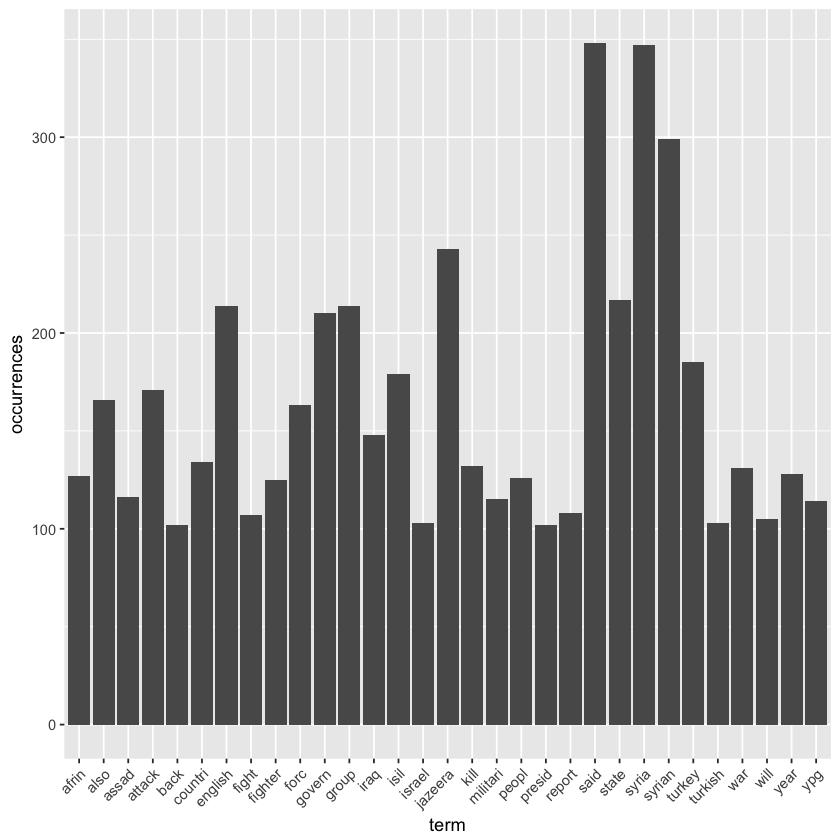

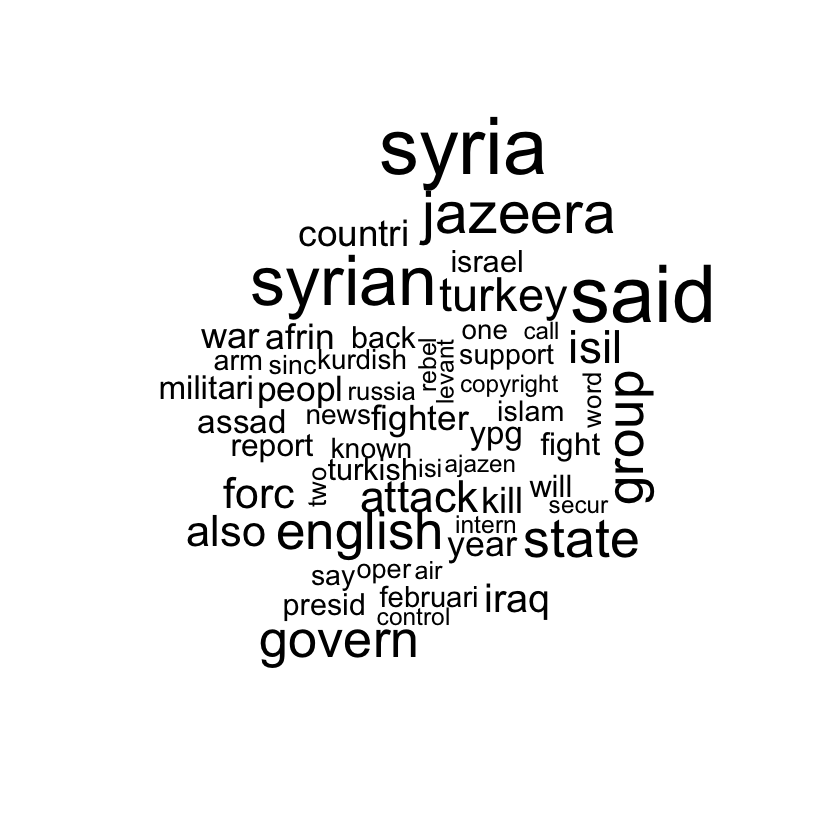

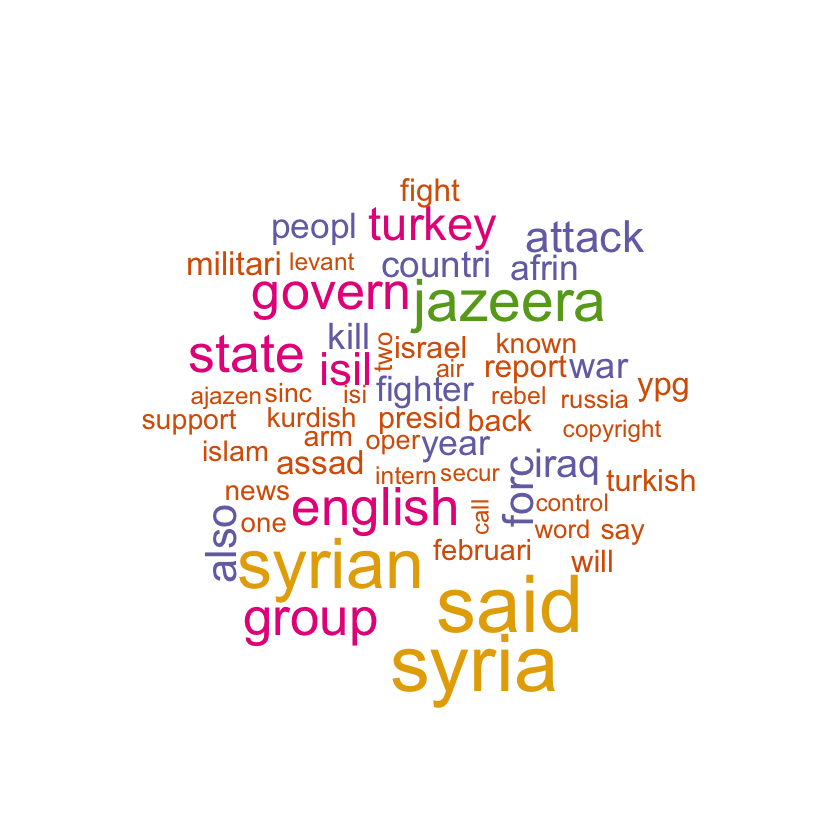

In [21]:
#collapse matrix by summing over columns - this gets total counts (over all docs) for each term
freq <- colSums(as.matrix(dtm))
#length should be total number of terms
length(freq)

#create sort order (descending)
ord <- order(freq,decreasing=TRUE)
#inspect most frequently occurring terms
freq[head(ord)]
#inspect least frequently occurring terms
freq[tail(ord)]

#List all terms in decreasing order of freq and write to disk
write.csv(freq[ord],"word_freq.csv")

#alterantive: remove very frequent and very rare words
dtmr <-DocumentTermMatrix(article.corpus, control=list(wordLengths=c(4, 20),
                                  bounds = list(global = c(3,27))))

dtmr

freqr <- colSums(as.matrix(dtmr))
#length should be total number of terms
length(freqr)

#create sort order (desc)
ordr <- order(freqr,decreasing=TRUE)
#inspect most frequently occurring terms
freqr[head(ordr)]
#inspect least frequently occurring terms
freqr[tail(ordr)]

#list most frequent terms. Lower bound specified as second argument
findFreqTerms(dtmr,lowfreq=60)

#correlations
findAssocs(dtmr,"turkish",0.6)
findAssocs(dtm,"children",0.6)

#Basic graphics
#histogram
wf=data.frame(term=names(freq),occurrences=freq)
library(ggplot2)
p <- ggplot(subset(wf, freq>100), aes(term, occurrences))
p <- p + geom_bar(stat="identity")
p <- p + theme(axis.text.x=element_text(angle=45, hjust=1))
p

#wordcloud
library(wordcloud)
#setting the same seed each time ensures consistent look across clouds
set.seed(42)
#limit words by specifying min frequency
wordcloud(names(freq),freq, min.freq=70)
#...add color
wordcloud(names(freq),freq,min.freq=70,colors=brewer.pal(6,"Dark2"))

#Topic modeling
#load topic modeling library
library(topicmodels)
#Set parameters for Gibbs sampling
burnin <- 4000
iter <- 2000
thin <- 500
seed <-list(2003,5,63,100001,765)
nstart <- 5
best <- TRUE


#Number of topics
k <- 5

#Run LDA using Gibbs sampling
ldaOut <-LDA(dtm,k, method="Gibbs", control=list(nstart=nstart, seed = seed, best=best, burnin = burnin, iter = iter, thin=thin))

#write out results
#docs to topics
ldaOut.topics <- as.matrix(topics(ldaOut))
write.csv(ldaOut.topics,file=paste("LDAGibbs",k,"DocsToTopics.csv"))

#top 6 terms in each topic
ldaOut.terms <- as.matrix(terms(ldaOut,6))
write.csv(ldaOut.terms,file=paste("LDAGibbs",k,"TopicsToTerms.csv"))

#probabilities associated with each topic assignment
topicProbabilities <- as.data.frame(ldaOut@gamma)
write.csv(topicProbabilities,file=paste("LDAGibbs",k,"TopicProbabilities.csv"))

#Find relative importance of top 2 topics
topic1ToTopic2 <- lapply(1:nrow(dtm),function(x)
  sort(topicProbabilities[x,])[k]/sort(topicProbabilities[x,])[k-1])

#Find relative importance of second and third most important topics
topic2ToTopic3 <- lapply(1:nrow(dtm),function(x)
  sort(topicProbabilities[x,])[k-1]/sort(topicProbabilities[x,])[k-2])

#write to file
write.csv(topic1ToTopic2,file=paste("LDAGibbs",k,"Topic1ToTopic2.csv"))
write.csv(topic2ToTopic3,file=paste("LDAGibbs",k,"Topic2ToTopic3.csv"))